In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC, SVC, OneClassSVM
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv")

In [4]:
df.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [5]:
df.shape

(273, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               273 non-null    int64  
 1   Gender                   273 non-null    int64  
 2   Age                      273 non-null    int64  
 3   Schooling                272 non-null    float64
 4   Breastfeeding            273 non-null    int64  
 5   Varicella                273 non-null    int64  
 6   Initial_Symptom          272 non-null    float64
 7   Mono_or_Polysymptomatic  273 non-null    int64  
 8   Oligoclonal_Bands        273 non-null    int64  
 9   LLSSEP                   273 non-null    int64  
 10  ULSSEP                   273 non-null    int64  
 11  VEP                      273 non-null    int64  
 12  BAEP                     273 non-null    int64  
 13  Periventricular_MRI      273 non-null    int64  
 14  Cortical_MRI             2

In [7]:
unique_Class = df['group'].unique()
print(unique_Class)

[1 2]


In [8]:
df.isna().sum()

Unnamed: 0                   0
Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

In [11]:
numeric_cols = []
for col in df.columns:
    if df[col].nunique() > 2:
        numeric_cols.append(col)

print("\nColumns with more than 3 unique values ​​(numeric_cols):")
print(numeric_cols)


Columns with more than 3 unique values ​​(numeric_cols):
['Unnamed: 0', 'Age', 'Schooling', 'Breastfeeding', 'Varicella', 'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands', 'Initial_EDSS', 'Final_EDSS']


In [15]:
categoric_cols = []
for col in df.columns:
    if df[col].nunique() < 3:
        categoric_cols.append(col)

print("\nColumns with less than 3 unique values ​​:")
print(categoric_cols)


Columns with less than 3 unique values ​​:
['Gender', 'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI', 'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'group']


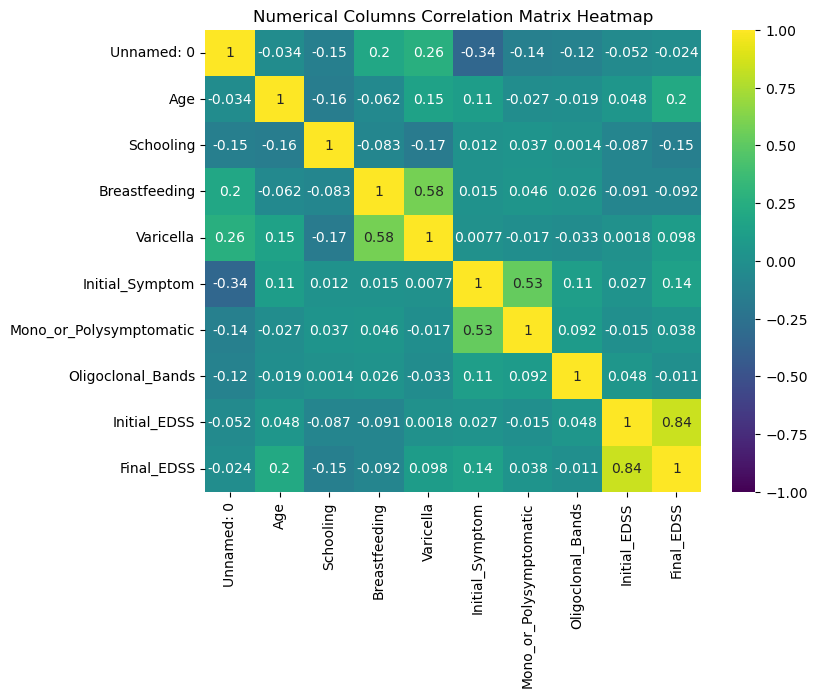

In [49]:
df_numeric = df[numeric_cols]
corr_matrix_numeric = df_numeric.corr()

plt.figure(figsize=(8, 6)) 
sns.heatmap(corr_matrix_numeric, annot=True, cmap='viridis', vmin=-1, vmax=1) 
plt.title('Numerical Columns Correlation Matrix Heatmap')
plt.show()

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_98686/1914150463.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y=col, data=df, palette=custom_palette)


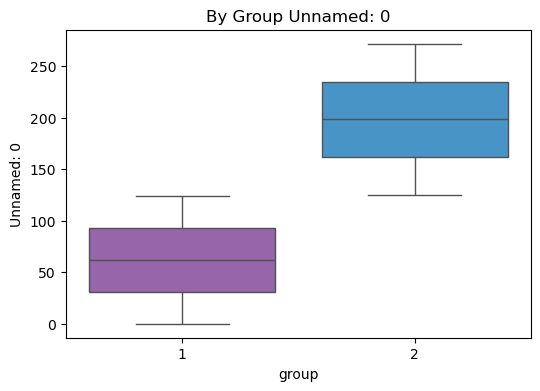

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_98686/1914150463.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y=col, data=df, palette=custom_palette)


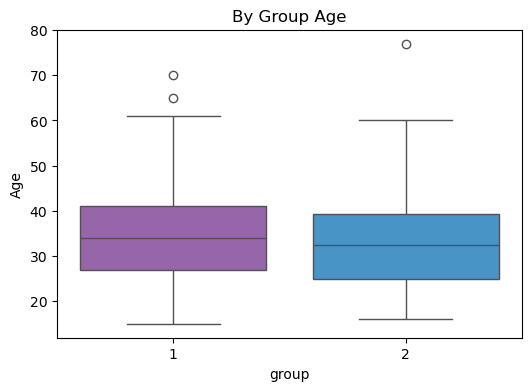

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_98686/1914150463.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y=col, data=df, palette=custom_palette)


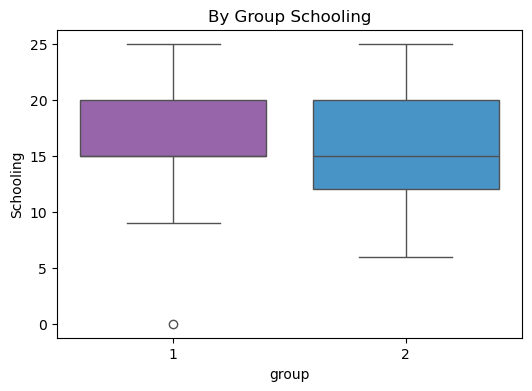

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_98686/1914150463.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y=col, data=df, palette=custom_palette)


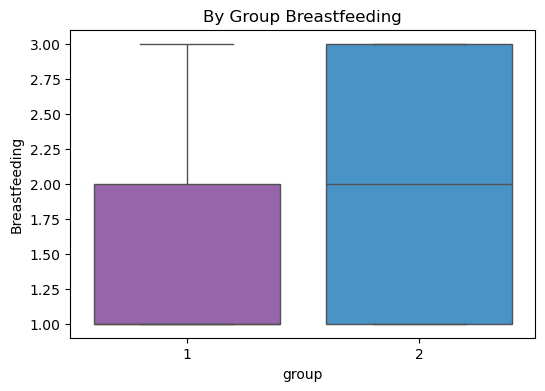

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_98686/1914150463.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y=col, data=df, palette=custom_palette)


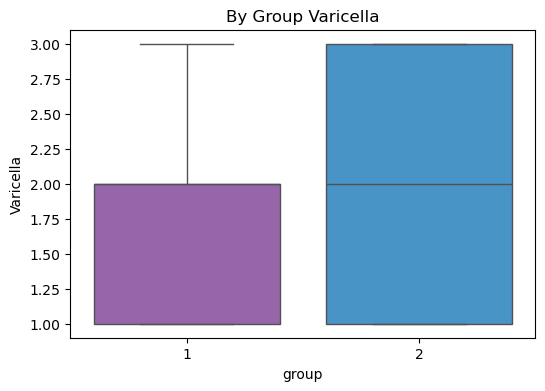

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_98686/1914150463.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y=col, data=df, palette=custom_palette)


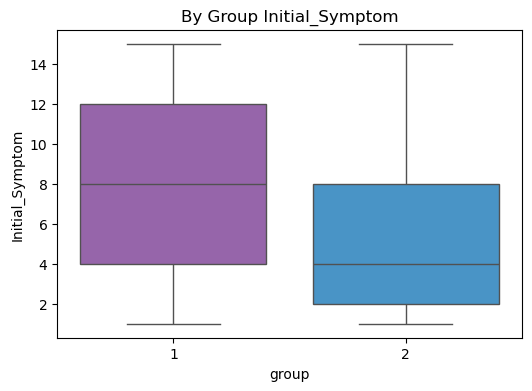

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_98686/1914150463.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y=col, data=df, palette=custom_palette)


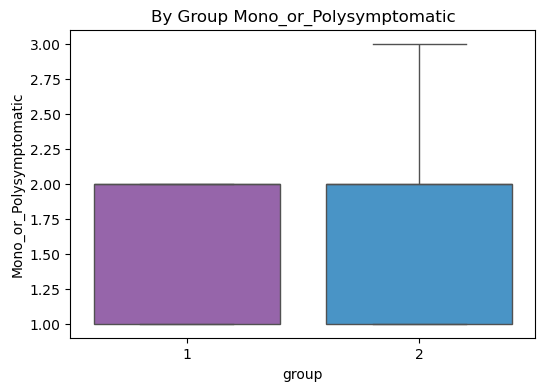

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_98686/1914150463.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y=col, data=df, palette=custom_palette)


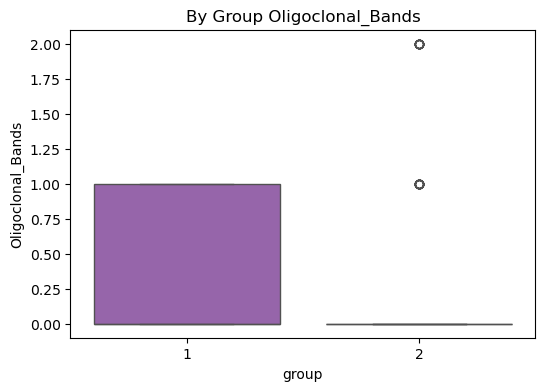

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_98686/1914150463.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y=col, data=df, palette=custom_palette)


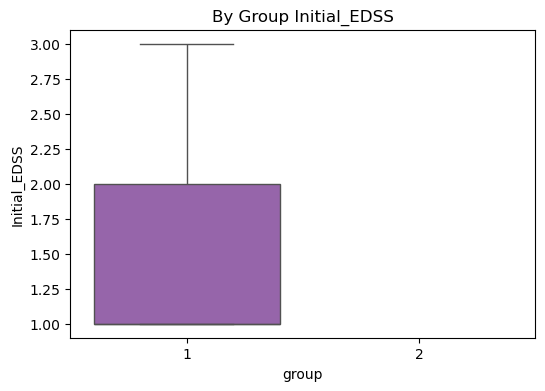

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_98686/1914150463.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y=col, data=df, palette=custom_palette)


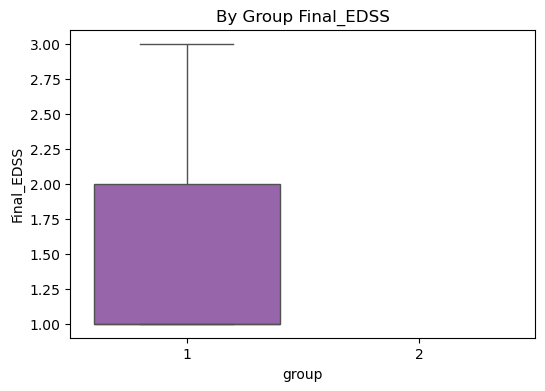

In [21]:
# We group by the group column.
grouped = df.groupby('group') 

# We specify the numerical columns to be plotted.
numeric_cols = ['Unnamed: 0', 'Age', 'Schooling', 'Breastfeeding', 'Varicella', 'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands', 'Initial_EDSS', 'Final_EDSS']
custom_palette = ["#9b59b6", "#3498db"] 
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='group', y=col, data=df, palette=custom_palette)
    plt.title(f'By Group {col}')
    plt.xlabel('group')
    plt.ylabel(col)
    plt.show()

In [22]:
#We will apply KNNImputer to fill in our missing data. 
#Since the KNN algorithm is based on distance  we need to apply a Standartscaler. We will also apply SVM algorithm.
#We're excluding our target column.
features_to_scale = df.drop('group', axis=1)
scaler = StandardScaler()

In [23]:
scaled_features = scaler.fit_transform(features_to_scale)

In [24]:
df_scaled_features = pd.DataFrame(scaled_features, columns=features_to_scale.columns, index=df.index)
df_scaled = pd.concat([df_scaled_features, df['group']], axis=1)
#Then we assign all of them, including the target column, to  df_scaled.

In [25]:
imputer = KNNImputer(n_neighbors=12) 

In [28]:
# We select our columns to be filled.
cols_to_impute = ['Initial_EDSS', 'Final_EDSS', 'Schooling', 'Initial_Symptom']
df_scaled[cols_to_impute] = imputer.fit_transform(df_scaled[cols_to_impute])

In [29]:
df_scaled.isna().sum()

Unnamed: 0                 0
Gender                     0
Age                        0
Schooling                  0
Breastfeeding              0
Varicella                  0
Initial_Symptom            0
Mono_or_Polysymptomatic    0
Oligoclonal_Bands          0
LLSSEP                     0
ULSSEP                     0
VEP                        0
BAEP                       0
Periventricular_MRI        0
Cortical_MRI               0
Infratentorial_MRI         0
Spinal_Cord_MRI            0
Initial_EDSS               0
Final_EDSS                 0
group                      0
dtype: int64

In [30]:
X = df_scaled.drop('group', axis=1) 
y = df_scaled['group']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
linear_svm = LinearSVC(random_state=42, dual= False,  max_iter=1000) 
linear_svm.fit(X_train, y_train)
#We create and train our model.

# We make predictions on the test set.
y_pred_linear = linear_svm.predict(X_test)

# Let's evaluate the performance
print("Linear SVM (LinearSVC) Performance:")
print(classification_report(y_test, y_pred_linear))

Linear SVM (LinearSVC) Performance:
              precision    recall  f1-score   support

           1       0.95      0.98      0.96        41
           2       0.97      0.95      0.96        41

    accuracy                           0.96        82
   macro avg       0.96      0.96      0.96        82
weighted avg       0.96      0.96      0.96        82



In [33]:
#Non-linear SVM
#Radial Basis Function (RBF) Kernel.
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 'scale', 'auto']}

#We create the GridSearchCV object.
grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42),
                           param_grid,
                           cv=5, 
                           scoring='accuracy',  
                           n_jobs=-1)  

# We run GridSearchCV on the training data.
grid_search.fit(X_train, y_train)

# We obtain the best hyperparameters and the best score.
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best hyperparameters: {best_params}")
print(f"Best accuracy score: {best_score}")

# En iyi modelle test kümesi üzerinde tahmin yapın
best_rbf_svm = grid_search.best_estimator_
y_pred_best_rbf = best_rbf_svm.predict(X_test)
print("\nBest RBF SVM Performance (Test Set):")
print(classification_report(y_test, y_pred_best_rbf))

Best hyperparameters: {'C': 100, 'gamma': 0.01}
Best accuracy score: 0.9790823211875844

Best RBF SVM Performance (Test Set):
              precision    recall  f1-score   support

           1       0.98      0.98      0.98        41
           2       0.98      0.98      0.98        41

    accuracy                           0.98        82
   macro avg       0.98      0.98      0.98        82
weighted avg       0.98      0.98      0.98        82



In [34]:
#Polynomial Kernel
param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4, 5], 
    'coef0': [-1, 0, 1]      # Independent term in the kernel
}
grid_search_poly = GridSearchCV(SVC(kernel='poly', random_state=42),
                               param_grid_poly,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1)
grid_search_poly.fit(X_train, y_train)
best_params_poly = grid_search_poly.best_params_
best_score_poly = grid_search_poly.best_score_
print(f"\nBest Hyperparameters for Polynomial Kernel: {best_params_poly}")
print(f"Best Accuracy Score for Polynomial Kernel (Cross Validation): {best_score_poly}")


best_poly_svm = grid_search_poly.best_estimator_
y_pred_best_poly = best_poly_svm.predict(X_test)
print("\nBest Polynomial Kernel SVM Performance (Test Set):")
print(classification_report(y_test, y_pred_best_poly))


Best Hyperparameters for Polynomial Kernel: {'C': 1, 'coef0': 1, 'degree': 2}
Best Accuracy Score for Polynomial Kernel (Cross Validation): 0.9842105263157895

Best Polynomial Kernel SVM Performance (Test Set):
              precision    recall  f1-score   support

           1       0.97      0.93      0.95        41
           2       0.93      0.98      0.95        41

    accuracy                           0.95        82
   macro avg       0.95      0.95      0.95        82
weighted avg       0.95      0.95      0.95        82



In [35]:
#Linear Kernel
linear_kernel_svm = SVC(kernel='linear', random_state=42)
linear_kernel_svm.fit(X_train, y_train)
y_pred_linear_kernel = linear_kernel_svm.predict(X_test)
print("\nLinear SVM (SVC - Linear Kernel) Performance:")
print(classification_report(y_test, y_pred_linear_kernel))


Linear SVM (SVC - Linear Kernel) Performance:
              precision    recall  f1-score   support

           1       0.93      0.98      0.95        41
           2       0.97      0.93      0.95        41

    accuracy                           0.95        82
   macro avg       0.95      0.95      0.95        82
weighted avg       0.95      0.95      0.95        82



In [36]:
#K-Nearest Neighbors - KNN

param_grid_knn = {'n_neighbors': list(range(1, 21))}  # Number of neighbors to try

grid_search_knn = GridSearchCV(KNeighborsClassifier(),
                               param_grid_knn,
                               cv=5,  
                               scoring='accuracy',
                               n_jobs=-1)

grid_search_knn.fit(X_train, y_train)

best_k = grid_search_knn.best_params_['n_neighbors']
best_score_knn = grid_search_knn.best_score_

print(f"\nBest K Value (n_neighbors): {best_k}")
print(f"Best Accuracy Score (Cross Validation): {best_score_knn}")


best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train, y_train)
y_pred_best_knn = best_knn_model.predict(X_test)

print("\nBest KNN Model Performance (Test Set):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_knn)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_knn))


Best K Value (n_neighbors): 14
Best Accuracy Score (Cross Validation): 0.8955465587044534

Best KNN Model Performance (Test Set):
Accuracy: 0.8780487804878049

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.88      0.88        41
           2       0.88      0.88      0.88        41

    accuracy                           0.88        82
   macro avg       0.88      0.88      0.88        82
weighted avg       0.88      0.88      0.88        82

